In [1]:
# Import depencdencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-17.840929342697365 85.51872752855576
-4.2143552573412535 -38.72705100111253
-70.70907219251458 -131.93341519452733
64.2737017438703 176.02630273445874
-23.64225867643225 71.28333731415049
59.32634706180289 -26.841345586499926
23.381637016278788 8.61850501466995
-59.90561748334213 -89.80858417554064
-0.3357410363986588 -46.332932101669456
40.294058400374865 169.99185489463883
41.524490916385844 20.800807303047577
-8.655895809105417 -128.6670507523388
-40.88411955085657 154.03444697565692
16.716000579270656 6.516120905694152
8.846010028516162 40.68468609359755
86.36395857466803 -45.95467750051742
-23.259527841167824 51.427428933302735
53.50925837703025 138.09497206809704
-39.0858718096887 38.73478422631044
-45.19907252178474 135.5533683721282
-16.463262679577227 -154.59337562667054
85.93358938124774 17.519589284822956
82.86062511963749 134.81459789086693
29.893957248436394 -56.52855606260118
37.6973868714895 -7.6073859176711665
-76.45515375058542 111.58675470445633
58.375940156386974 17

In [5]:
# Import the citipy module.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

591

In [7]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    
    #Group cities into sets of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create an end point with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API Request for each of the cities.
    try:
        # Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the data to ISO Standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
      
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | redencao
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 1 | grindavik
Processing Record 7 of Set 1 | gat
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | augusto correa
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | drugovo
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | batemans bay
Processing Record 14 of Set 1 | abalak
Processing Record 15 of Set 1 | bedesa
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | manakara
Processing Record 18 of Set 1 | mnogovershinnyy
Processing Record 19 of Set 1 | margate
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | faanui
Processing Record 22 of Set 1 | l

Processing Record 38 of Set 4 | arman
Processing Record 39 of Set 4 | brae
Processing Record 40 of Set 4 | simao
Processing Record 41 of Set 4 | methoni
Processing Record 42 of Set 4 | camacha
Processing Record 43 of Set 4 | lalomanu
City not found. Skipping...
Processing Record 44 of Set 4 | parana
Processing Record 45 of Set 4 | isla mujeres
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | tanete
Processing Record 48 of Set 4 | mitu
Processing Record 49 of Set 4 | saskylakh
Processing Record 50 of Set 4 | agadir
Processing Record 1 of Set 5 | dikson
Processing Record 2 of Set 5 | raton
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | fereydun kenar
Processing Record 5 of Set 5 | hami
Processing Record 6 of Set 5 | biskamzha
Processing Record 7 of Set 5 | quatre cocos
Processing Record 8 of Set 5 | mahebourg
Processing Record 9 of Set 5 | vardo
Processing Record 10 of Set 5 | kenai
Processing Record 11 of Set 5 | sao joao da barra
Processing

Processing Record 29 of Set 8 | cocachacra
Processing Record 30 of Set 8 | olafsvik
Processing Record 31 of Set 8 | kropotkin
Processing Record 32 of Set 8 | dabat
Processing Record 33 of Set 8 | saint-pierre
Processing Record 34 of Set 8 | urumqi
Processing Record 35 of Set 8 | burica
City not found. Skipping...
Processing Record 36 of Set 8 | tarakan
Processing Record 37 of Set 8 | yidu
Processing Record 38 of Set 8 | weyburn
Processing Record 39 of Set 8 | nishihara
Processing Record 40 of Set 8 | ewa beach
Processing Record 41 of Set 8 | junin
Processing Record 42 of Set 8 | ormara
Processing Record 43 of Set 8 | labutta
City not found. Skipping...
Processing Record 44 of Set 8 | clyde river
Processing Record 45 of Set 8 | caravelas
Processing Record 46 of Set 8 | yuncheng
Processing Record 47 of Set 8 | touba
Processing Record 48 of Set 8 | saint-donat-de-montcalm
Processing Record 49 of Set 8 | isangel
Processing Record 50 of Set 8 | el burrion
Processing Record 1 of Set 9 | roth

Processing Record 19 of Set 12 | tabas
Processing Record 20 of Set 12 | sudova vyshnya
Processing Record 21 of Set 12 | pecos
Processing Record 22 of Set 12 | ngemplak
Processing Record 23 of Set 12 | krasnoselkup
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | saint-joseph
Processing Record 26 of Set 12 | kitui
Processing Record 27 of Set 12 | coari
Processing Record 28 of Set 12 | phan rang
City not found. Skipping...
Processing Record 29 of Set 12 | champerico
Processing Record 30 of Set 12 | chowchilla
Processing Record 31 of Set 12 | cap malheureux
Processing Record 32 of Set 12 | arvin
Processing Record 33 of Set 12 | saarbrucken
Processing Record 34 of Set 12 | dudinka
Processing Record 35 of Set 12 | ossora
Processing Record 36 of Set 12 | uwayl
City not found. Skipping...
Processing Record 37 of Set 12 | atikokan
Processing Record 38 of Set 12 | pacific grove
Processing Record 39 of Set 12 | tarragona
Processing Record 40 of Set 12 | karasjok
Processi

In [13]:
len(city_data)

549

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,81.09,68,99,3.00,MV,2022-07-20 23:37:16
1,Redencao,-4.2258,-38.7306,70.32,87,65,2.08,BR,2022-07-20 23:33:20
2,Rikitea,-23.1203,-134.9692,73.44,74,0,3.85,PF,2022-07-20 23:36:29
3,Anadyr,64.7500,177.4833,48.70,66,75,11.18,RU,2022-07-20 23:37:17
4,Grindavik,63.8424,-22.4338,51.75,87,0,11.50,IS,2022-07-20 23:37:17
...,...,...,...,...,...,...,...,...,...
544,Atikokan,48.7555,-91.6216,78.49,42,71,10.74,CA,2022-07-20 23:49:33
545,Pacific Grove,36.6177,-121.9166,79.02,81,20,9.22,US,2022-07-20 23:50:17
546,Tarragona,41.1290,1.2490,79.39,75,0,5.99,ES,2022-07-20 23:52:18
547,Karasjok,69.4719,25.5112,56.19,81,98,4.79,NO,2022-07-20 23:52:18


In [11]:
# Reordering the columns in the DataFrame.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2022-07-20 23:37:16,-0.6000,73.0833,81.09,68,99,3.00
1,Redencao,BR,2022-07-20 23:33:20,-4.2258,-38.7306,70.32,87,65,2.08
2,Rikitea,PF,2022-07-20 23:36:29,-23.1203,-134.9692,73.44,74,0,3.85
3,Anadyr,RU,2022-07-20 23:37:17,64.7500,177.4833,48.70,66,75,11.18
4,Grindavik,IS,2022-07-20 23:37:17,63.8424,-22.4338,51.75,87,0,11.50
...,...,...,...,...,...,...,...,...,...
544,Atikokan,CA,2022-07-20 23:49:33,48.7555,-91.6216,78.49,42,71,10.74
545,Pacific Grove,US,2022-07-20 23:50:17,36.6177,-121.9166,79.02,81,20,9.22
546,Tarragona,ES,2022-07-20 23:52:18,41.1290,1.2490,79.39,75,0,5.99
547,Karasjok,NO,2022-07-20 23:52:18,69.4719,25.5112,56.19,81,98,4.79


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

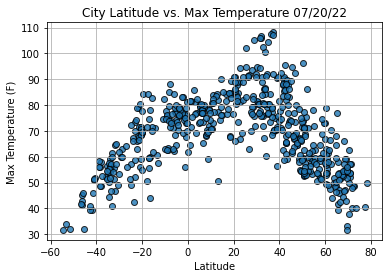

In [22]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorperate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig1.png")

# Show plot.
plt.show()

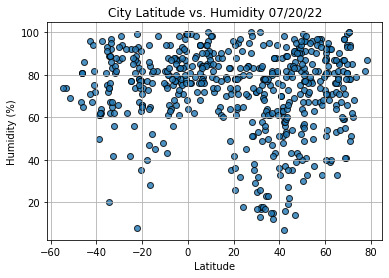

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

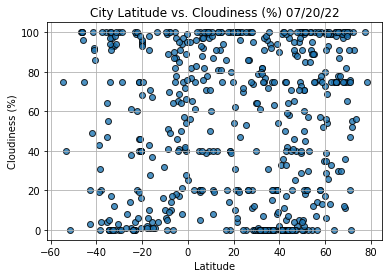

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

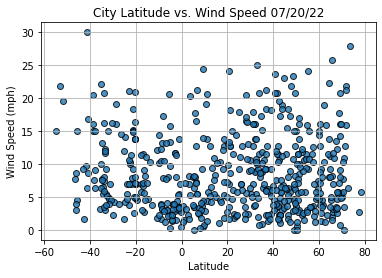

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()